**STEP 1: DATASET DOWNLOAD ✅**

**STEP 2: IMPORTS ✅**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


**STEP 3: LOADING THE DATASET ✅**

In [2]:
# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**STEP 4: TRAINING SVM ✅**

In [3]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)
print("Linear Kernel SVM Report:\n")
print(classification_report(y_test, y_pred_linear))


Linear Kernel SVM Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [4]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)
print("RBF Kernel SVM Report:\n")
print(classification_report(y_test, y_pred_rbf))


RBF Kernel SVM Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**STEP 5: HYPERPARAMETER TUNING ✅**

In [5]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
grid_predictions = grid.predict(X_test)
print("Classification Report After Tuning:\n", classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Classification Report After Tuning:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**STEP 6: VISUALIZATION ✅**

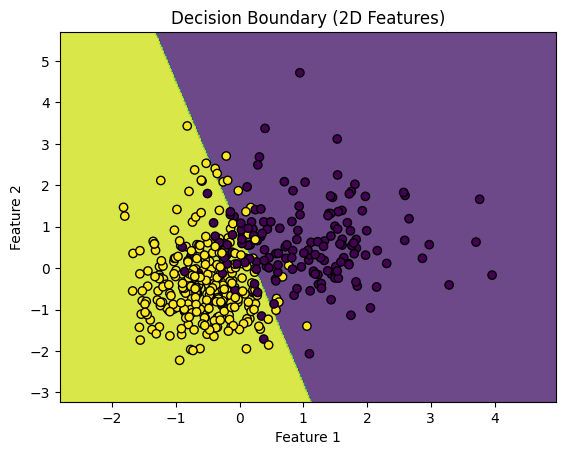

In [6]:
X_vis = X[:, :2]  # take only first 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

clf_vis = SVC(kernel='linear')
clf_vis.fit(X_train_vis, y_train_vis)

# Plotting decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary (2D Features)")
    plt.show()

plot_decision_boundary(clf_vis, X_train_vis, y_train_vis)
